C:\Users\Timothe\AppData\Local\Temp\ipykernel_50532\676841455.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
C:\Users\Timothe\AppData\Local\Temp\ipykernel_50532\676841455.py:89: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_data['open_price_diff'] = monthly_data['open_price'].diff().fillna(method='bfill')
C:\Users\Timothe\AppData\Local\Temp\ipykernel_50532\676841455.py:90: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_data['open_price_diff'] = weekly_data['open_price'].diff().fillna(method='bfill')
C:\Users\Timothe\AppData\Local\Temp\ipykernel_50532\676841455.py:91: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. U

Checking stationarity for 'open_price':
ADF Statistic: -1.541399
p-value: 0.512942
Series is not stationary
Checking stationarity for 'open_price' after differencing:
ADF Statistic: -4.209626
p-value: 0.000635
Series is stationary
Monthly Data Analysis:
Distribution Plot:


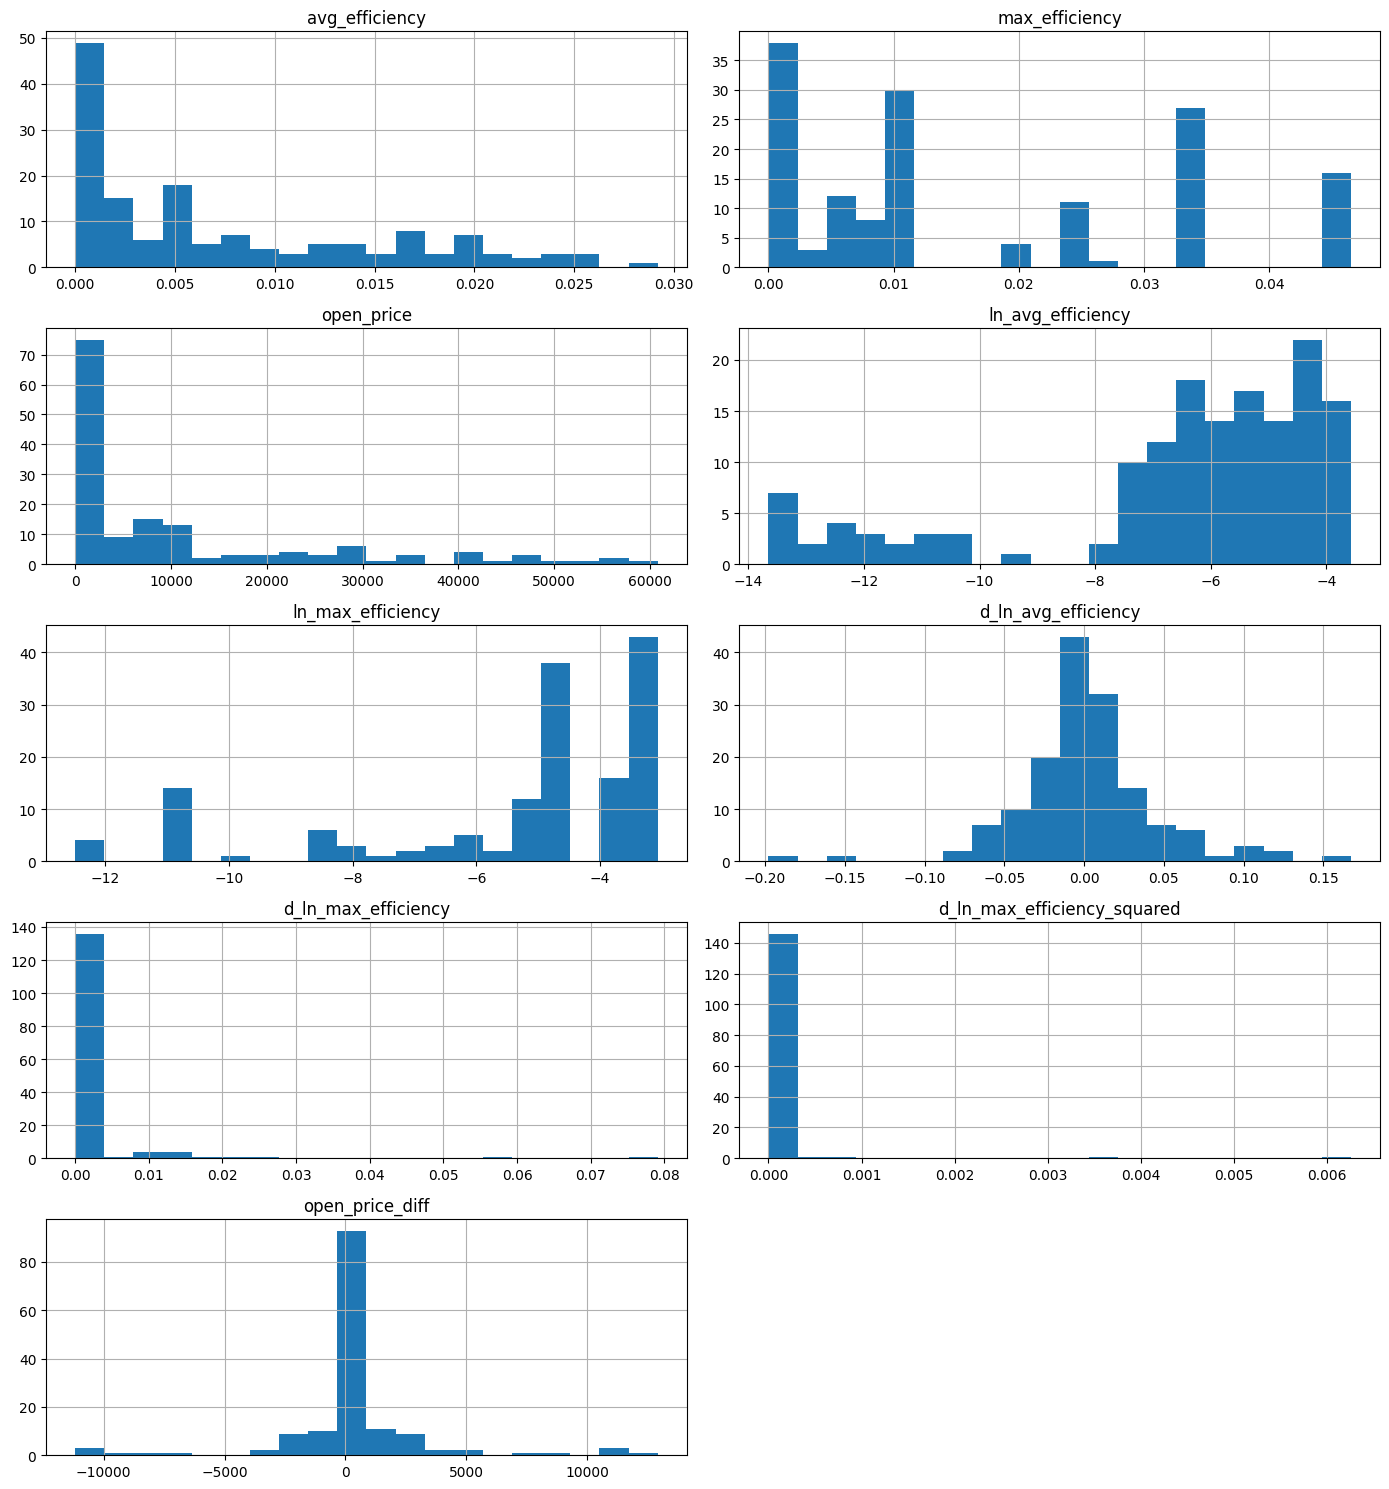

Summary Statistics:
                             count          mean           std           min  \
avg_efficiency               150.0      0.007475      0.007712      0.000001   
max_efficiency               150.0      0.016663      0.015813      0.000004   
open_price                   150.0  10348.633934  14937.741336      2.681773   
ln_avg_efficiency            150.0     -6.544586      2.735709    -13.652316   
ln_max_efficiency            150.0     -5.371417      2.531226    -12.485787   
d_ln_avg_efficiency          150.0      0.002143      0.043361     -0.197860   
d_ln_max_efficiency          150.0      0.002065      0.008930      0.000000   
d_ln_max_efficiency_squared  150.0      0.000083      0.000585      0.000000   
open_price_diff              150.0    194.384023   3140.265957 -11177.666621   

                                    25%          50%           75%  \
avg_efficiency                 0.001084     0.004891      0.013275   
max_efficiency                 0.002094

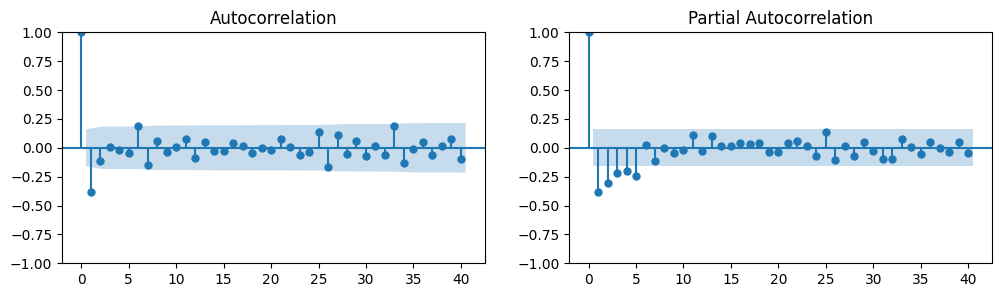

ACF and PACF Plots for d_ln_max_efficiency:


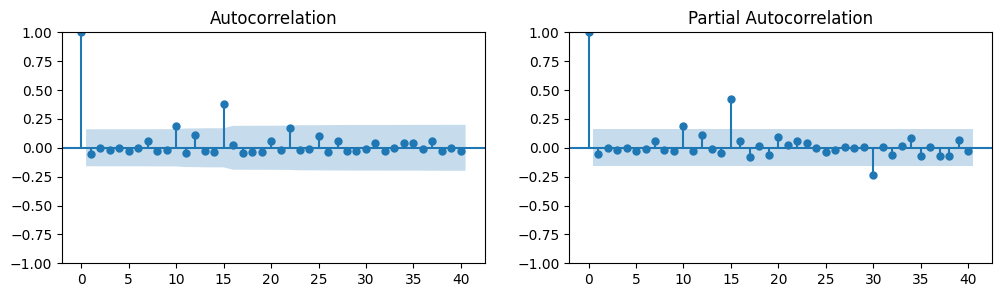

Weekly Data Analysis:
Distribution Plot:


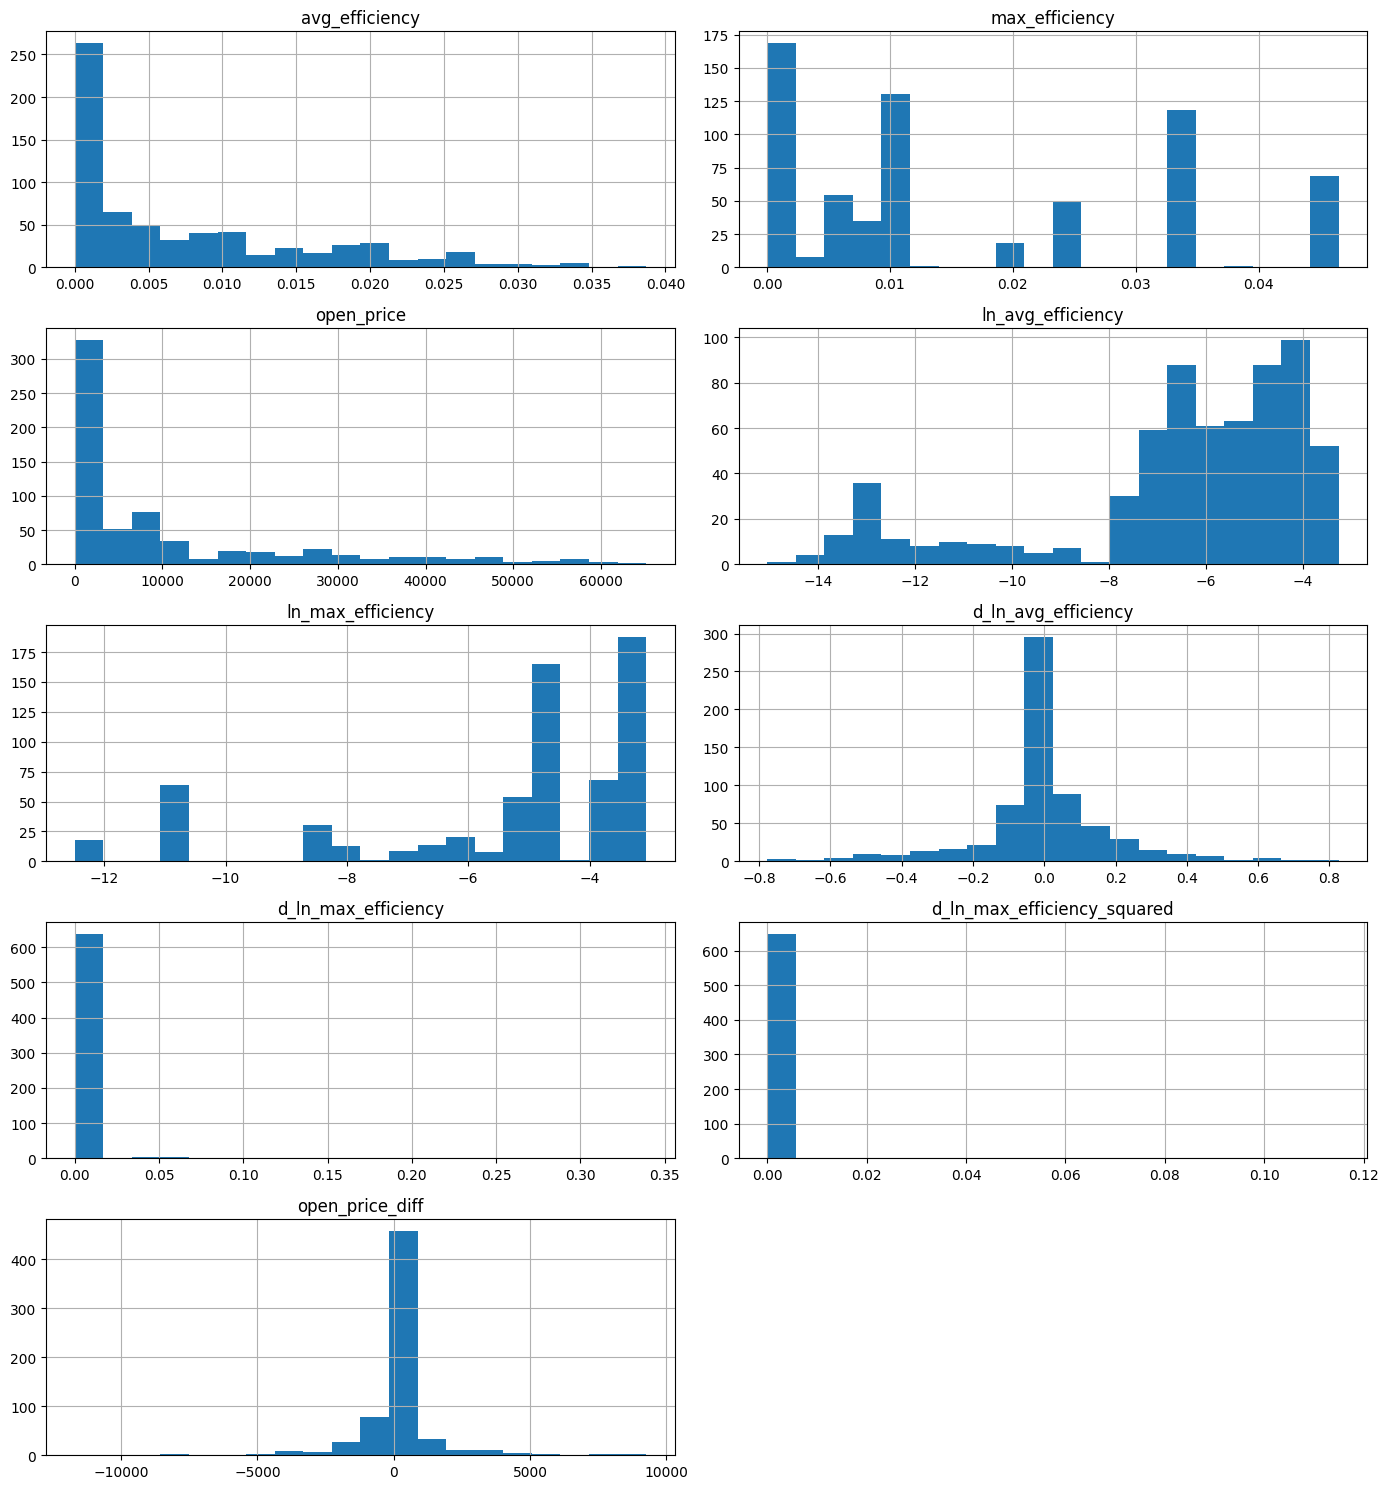

Summary Statistics:
                             count          mean           std           min  \
avg_efficiency               653.0      0.007461      0.008460  6.130000e-07   
max_efficiency               653.0      0.016629      0.015771  3.780000e-06   
open_price                   653.0  10316.432966  14948.051988  2.257900e+00   
ln_avg_efficiency            653.0     -6.555767      2.808558 -1.505618e+01   
ln_max_efficiency            653.0     -5.383669      2.541379 -1.248579e+01   
d_ln_avg_efficiency          653.0      0.002193      0.186927 -7.779180e-01   
d_ln_max_efficiency          653.0      0.002060      0.018894  0.000000e+00   
d_ln_max_efficiency_squared  653.0      0.000361      0.005264  0.000000e+00   
open_price_diff              653.0     51.076916   1475.409428 -1.170735e+04   

                                    25%          50%           75%  \
avg_efficiency                 0.000858     0.003829      0.011594   
max_efficiency                 0.002000

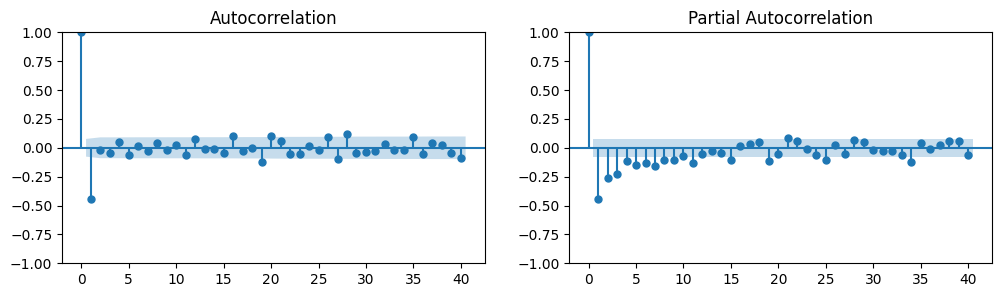

ACF and PACF Plots for d_ln_max_efficiency:


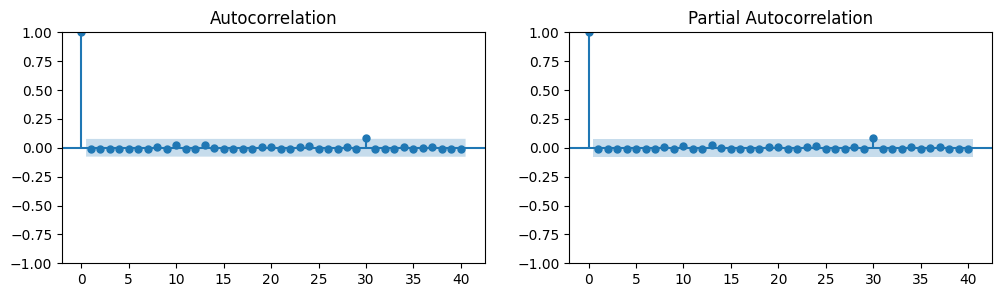

Daily Data Analysis:
Distribution Plot:


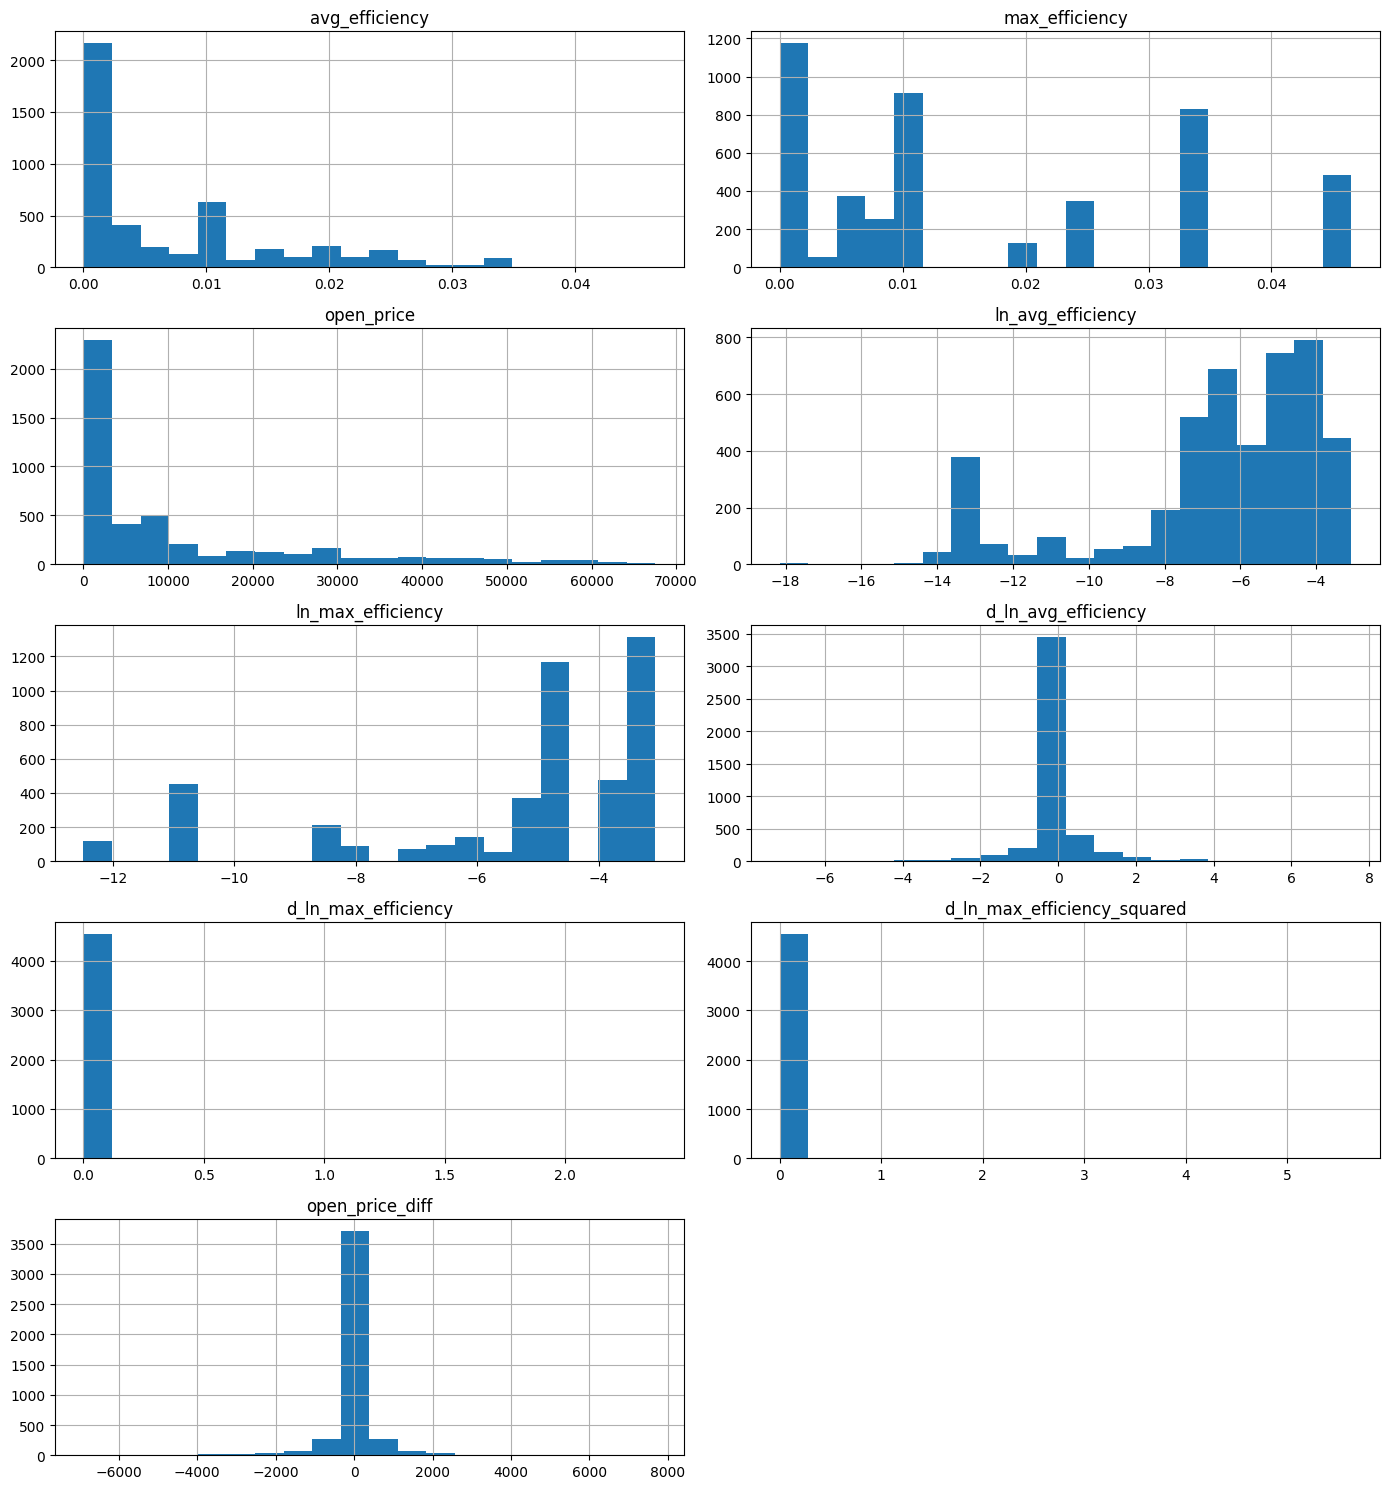

Summary Statistics:
                              count          mean           std           min  \
avg_efficiency               4565.0      0.007470      0.008948  1.300000e-08   
max_efficiency               4565.0      0.016651      0.015763  3.780000e-06   
open_price                   4565.0  10329.988365  14961.703961  2.050000e+00   
ln_avg_efficiency            4565.0     -6.546739      2.883125 -1.815832e+01   
ln_max_efficiency            4565.0     -5.374334      2.528754 -1.248579e+01   
d_ln_avg_efficiency          4565.0      0.002196      0.857756 -7.163968e+00   
d_ln_max_efficiency          4565.0      0.002063      0.050244  0.000000e+00   
d_ln_max_efficiency_squared  4565.0      0.002528      0.097682  0.000000e+00   
open_price_diff              4565.0      7.462413    669.211861 -6.901783e+03   

                                    25%          50%           75%  \
avg_efficiency                 0.000768     0.003068      0.010633   
max_efficiency               

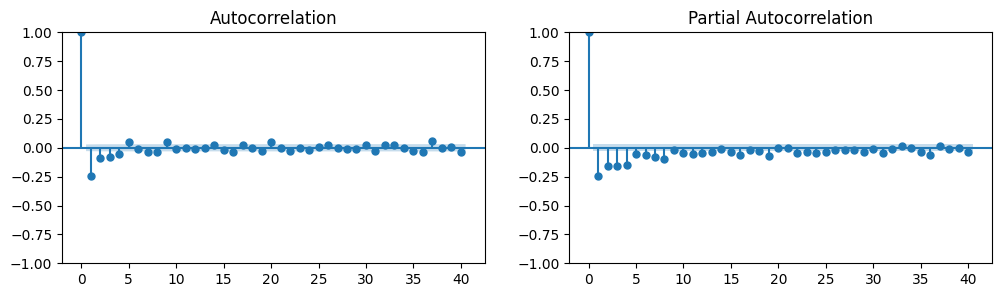

ACF and PACF Plots for d_ln_max_efficiency:


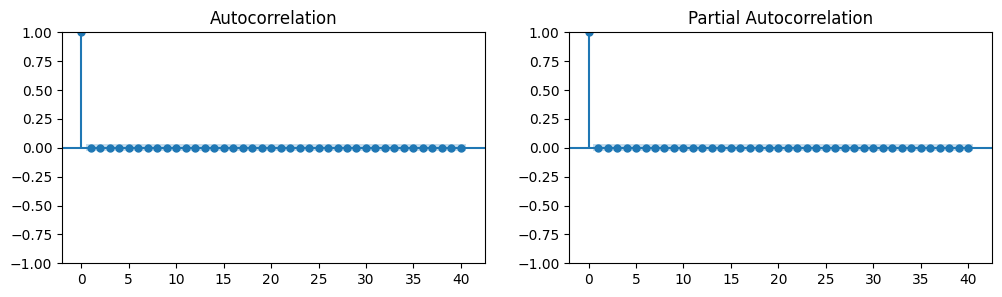

Monthly Data Model Estimation:
Model Estimation Results:
   p  q          MAE           MSE         RMSE          AIC          BIC  \
0  8  6  3983.416438  2.978910e+07  5457.939363  2114.598088  2167.401434   

   Ljung-Box  Durbin-Watson    Jarque-Bera  Shapiro-Wilk  White Test  
0   0.999987       1.971957  8.460156e-243  6.808340e-14    0.995528  
Best Model:
p                 8.000000e+00
q                 6.000000e+00
MAE               3.983416e+03
MSE               2.978910e+07
RMSE              5.457939e+03
AIC               2.114598e+03
BIC               2.167401e+03
Ljung-Box         9.999866e-01
Durbin-Watson     1.971957e+00
Jarque-Bera      8.460156e-243
Shapiro-Wilk      6.808340e-14
White Test        9.955284e-01
Name: 0, dtype: float64
Weekly Data Model Estimation:
Model Estimation Results:
   p  q          MAE           MSE         RMSE          AIC          BIC  \
0  6  1  1757.927239  6.952634e+06  2636.784691  8602.435605  8653.504606   

   Ljung-Box  Durbin-Watson

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import skew, kurtosis, shapiro

# Read the input data from the CSV file
data = pd.read_csv('inputs.csv', parse_dates=['date']) # date,avg_efficiency,max_efficiency,open_price

# Calculate the derivative of ln avg_efficiency and ln max_efficiency per day
data['ln_avg_efficiency'] = np.log(data['avg_efficiency'].replace(0, np.nan))
data['ln_max_efficiency'] = np.log(data['max_efficiency'].replace(0, np.nan))
data['d_ln_avg_efficiency'] = data['ln_avg_efficiency'].diff()
data['d_ln_max_efficiency'] = data['ln_max_efficiency'].diff()

# Fill NaN values after computing differences
data.fillna(method='bfill', inplace=True)

# Create monthly averages
monthly_data = data.resample('M', on='date').mean()

# Create weekly averages
weekly_data = data.resample('W', on='date').mean()

# Keep daily data
daily_data = data

# Ensure no infinite values are present
monthly_data.replace([np.inf, -np.inf], np.nan, inplace=True)
weekly_data.replace([np.inf, -np.inf], np.nan, inplace=True)
daily_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill any remaining NaN values that might disrupt the model fitting
monthly_data.ffill(inplace=True)
weekly_data.ffill(inplace=True)
daily_data.ffill(inplace=True)

# Add squared max_efficiency derivative for model estimation
monthly_data['d_ln_max_efficiency_squared'] = monthly_data['d_ln_max_efficiency'] ** 2
weekly_data['d_ln_max_efficiency_squared'] = weekly_data['d_ln_max_efficiency'] ** 2
daily_data['d_ln_max_efficiency_squared'] = daily_data['d_ln_max_efficiency'] ** 2

# Function to perform exploratory data analysis
def exploratory_analysis(df):
    # Select only numeric columns for distribution, skewness, and kurtosis
    numeric_df = df.select_dtypes(include=[np.number])
    
    num_cols = len(numeric_df.columns)
    num_rows = (num_cols + 1) // 2  # Ensure enough rows to accommodate all columns
    print("Distribution Plot:")
    numeric_df.hist(bins=20, figsize=(14, num_rows * 3), layout=(num_rows, 2))
    plt.tight_layout()
    plt.show()

    print("Summary Statistics:")
    summary = numeric_df.describe().T
    summary['std'] = numeric_df.std()
    summary['skewness'] = numeric_df.skew()
    summary['kurtosis'] = numeric_df.kurtosis()
    print(summary)

    for col in ['d_ln_avg_efficiency', 'd_ln_max_efficiency']:
        if col in numeric_df.columns:
            print(f"ACF and PACF Plots for {col}:")
            fig, axes = plt.subplots(1, 2, figsize=(12, 3))
            sm.graphics.tsa.plot_acf(numeric_df[col].dropna(), lags=40, ax=axes[0])
            sm.graphics.tsa.plot_pacf(numeric_df[col].dropna(), lags=40, ax=axes[1])
            plt.show()

from statsmodels.tsa.stattools import adfuller

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] > 0.05:
        print("Series is not stationary")
    else:
        print("Series is stationary")

# Example of checking stationarity for the 'open_price' series
print("Checking stationarity for 'open_price':")
check_stationarity(monthly_data['open_price'])

# Differencing the series to make it stationary
monthly_data['open_price_diff'] = monthly_data['open_price'].diff().fillna(method='bfill')
weekly_data['open_price_diff'] = weekly_data['open_price'].diff().fillna(method='bfill')
daily_data['open_price_diff'] = daily_data['open_price'].diff().fillna(method='bfill')

# Re-check stationarity after differencing
print("Checking stationarity for 'open_price' after differencing:")
check_stationarity(monthly_data['open_price_diff'])

# Adjust the model estimation to use the differenced series
def model_estimation(df, p_range, q_range):
    results = []
    train_size = int(len(df) * 0.8)
    train_data = df.iloc[:train_size]
    test_data = df.iloc[train_size:]

    # Add a constant column to the exogenous variables
    train_exog = sm.add_constant(train_data[['d_ln_avg_efficiency', 'd_ln_max_efficiency', 'd_ln_max_efficiency_squared']])
    test_exog = sm.add_constant(test_data[['d_ln_avg_efficiency', 'd_ln_max_efficiency', 'd_ln_max_efficiency_squared']])

    for p in p_range:
        for q in q_range:
            try:
                model = ARIMA(train_data['open_price_diff'], order=(p, 1, q), exog=train_exog)
                model_fit = model.fit()
                
                predictions = model_fit.forecast(steps=len(test_data), exog=test_exog)

                mae = mean_absolute_error(test_data['open_price_diff'], predictions)
                mse = mean_squared_error(test_data['open_price_diff'], predictions)
                rmse = np.sqrt(mse)
                aic = model_fit.aic
                bic = model_fit.bic
                
                # Test residuals for autocorrelation, normality, and heteroscedasticity
                residuals = model_fit.resid
                
                # Autocorrelation tests
                ljung_box = sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)
                durbin_watson = sm.stats.durbin_watson(residuals)
                
                # Normality tests
                jarque_bera = sm.stats.jarque_bera(residuals)
                shapiro_wilk = shapiro(residuals)
                
                # Heteroscedasticity test
                white_test = sm.stats.het_white(residuals, model_fit.model.exog)
                
                results.append({
                    'p': p, 'q': q, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'AIC': aic, 'BIC': bic,
                    'Ljung-Box': ljung_box['lb_pvalue'].values[0], 'Durbin-Watson': durbin_watson,
                    'Jarque-Bera': jarque_bera[1], 'Shapiro-Wilk': shapiro_wilk[1],
                    'White Test': white_test[1]
                })
            except Exception as e:
                print(f"Error with ARIMA({p},1,{q}): {e}")
    
    results_df = pd.DataFrame(results)
    print("Model Estimation Results:")
    print(results_df)
    
    best_model = results_df.loc[results_df['MAE'].idxmin()]
    print("Best Model:")
    print(best_model)

# Perform exploratory data analysis
print("Monthly Data Analysis:")
exploratory_analysis(monthly_data)

print("Weekly Data Analysis:")
exploratory_analysis(weekly_data)

print("Daily Data Analysis:")
exploratory_analysis(daily_data)

import warnings
warnings.filterwarnings("ignore")


# Perform model estimation process
print("Monthly Data Model Estimation:")
monthly_data['d_ln_max_efficiency_squared'] = monthly_data['d_ln_max_efficiency'] ** 2
# model_estimation(monthly_data, range(0, 13), range(0, 13))
model_estimation(monthly_data, [8], [6])

print("Weekly Data Model Estimation:")
weekly_data['d_ln_max_efficiency_squared'] = weekly_data['d_ln_max_efficiency'] ** 2
# model_estimation(weekly_data, range(0, 51), range(0, 51))
model_estimation(weekly_data, [6], [1])

print("Daily Data Model Estimation:")
daily_data['d_ln_max_efficiency_squared'] = daily_data['d_ln_max_efficiency'] ** 2
# model_estimation(daily_data, range(0, 361), range(0, 361))
model_estimation(daily_data, [1], [1])